In [41]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

In [12]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [14]:
df = pd.read_csv('housepricedata.csv')

In [15]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [16]:
dataset = df.values

In [17]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [18]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [20]:

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [21]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [23]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [24]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [25]:

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [28]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32,activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [29]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.9031 - val_loss: 0.2077 - val_accuracy: 0.9178
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8894 - val_loss: 0.1918 - val_accuracy: 0.9178
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8992 - val_loss: 0.1912 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9012 - val_loss: 0.1919 - val_accuracy: 0.9224
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8953 - val_loss: 0.1910 - val_accuracy: 0.9178
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8904 - val_loss: 0.1915 - val_accuracy: 0.9224
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.8992 - val_loss: 0.2051 - val_accuracy: 0.9178
Epoch 8/100
3

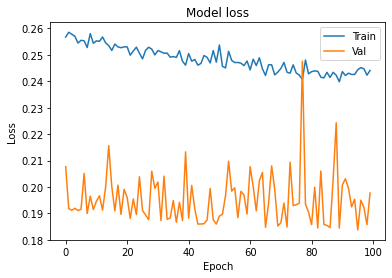

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

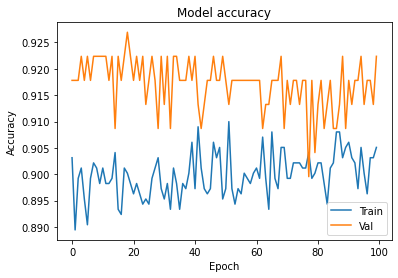

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [42]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [43]:

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 21.1209 - accuracy: 0.5968 - val_loss: 3.8876 - val_accuracy: 0.7443
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 2.5040 - accuracy: 0.8001 - val_loss: 0.5975 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5941 - accuracy: 0.8566 - val_loss: 0.4515 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5242 - accuracy: 0.8558 - val_loss: 0.4364 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5052 - accuracy: 0.8611 - val_loss: 0.4229 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4805 - accuracy: 0.8864 - val_loss: 0.4085 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5336 - accuracy: 0.8386 - val_loss: 0.4078 - val_accuracy: 0.9178
Epoch

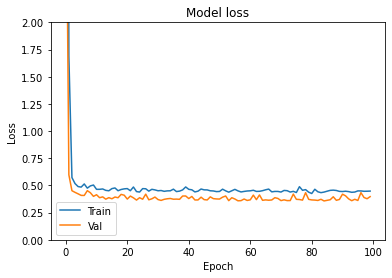

In [44]:

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.ylim(top=2, bottom=0)
plt.show()

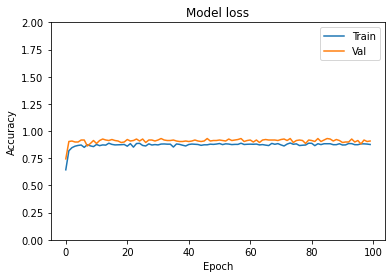

In [46]:

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=2, bottom=0)
plt.show()